In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

Сопряженное распределение к $Bern(p)$ - распределение $Beta(\alpha_0, \beta_0)$<br>
Тогда следующие априорные распределения отражают соответствующие априорные знания:

$Beta(10, 10)$ - "монета скорее честна"

$Beta(0.1, 0.1)$ - "монета нечестная"

$Beta(10, 1)$ - "монета скорее нечестная, перевес в сторону герба"

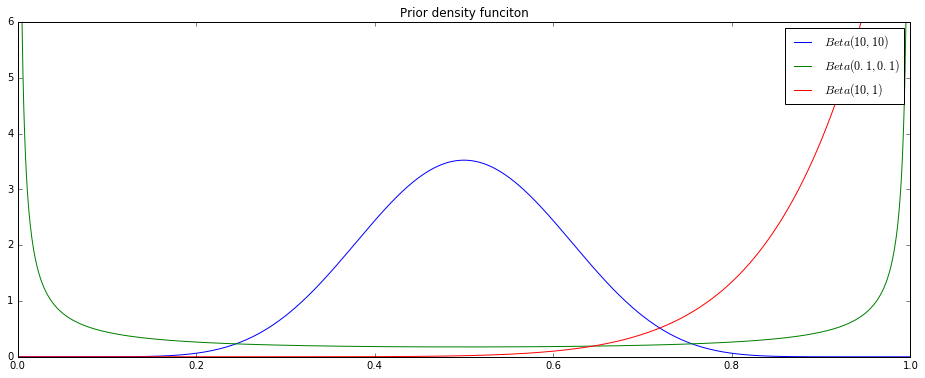

In [2]:
# Строим графики априорного распределения
# Генерируем сетку по оси x
step = 0.001
grid = np.arange(0, 1, step)

# Рисуем итоговый график
plt.figure(figsize=(16, 6))
plt.plot(grid, stats.beta.pdf(grid, 10, 10), label=r'$Beta(10, 10)$')
plt.plot(grid, stats.beta.pdf(grid, 0.1, 0.1), label=r'$Beta(0.1, 0.1)$')
plt.plot(grid, stats.beta.pdf(grid, 10, 1), label=r'$Beta(10, 1)$')

plt.title("Prior density funciton")
plt.legend()
plt.ylim(0, 6)
plt.show()

Сравним поведение байесовских оценок с указанными априорными распределениями и их интерпретациями
в зависимости от параметра $p$.

In [24]:
# Функция рассчета байесовской оценки для подвыборки в зависимости от параметров априорного распределения
def bayes_estimator(alpha_0, beta_0, sample):
    return (alpha_0 + np.sum(sample)) / (alpha_0 + beta_0 + len(sample))

# Вспомогательная функция генерации label для графика
def generate_label(alpha_0, beta_0):
    return r'\frac{' + str(alpha_0) + r'+\Sigma X_i}{' + str(alpha_0 + beta_0) + r'+n}'

In [40]:
# Генерируем выборку и считаем модуль отклонения
N = 20
# Для удобства составим список исследуемых оценок
estimations = [((lambda x: np.mean(x)),                   r'\overline{X}'),
               ((lambda x: bayes_estimator(10, 10, x)),   generate_label(10, 10)),
               ((lambda x: bayes_estimator(0.1, 0.1, x)), generate_label(0.1, 0.1)),
               ((lambda x: bayes_estimator(10, 1, x)),    generate_label(10, 1))]
def demonstrate(p):
    sample = np.random.binomial(1, p, N)
    print(sample)
    # Инициализация
    dif = [0] * len(estimations)
    for i in range(len(estimations)):
        dif[i] = np.zeros(N)

    # Подсчет модуля разности для n < N
    for n in range(1, N + 1):
        for i in range(len(estimations)):
            dif[i][n - 1] = abs(estimations[i][0](sample[:n]) - p)
    
    # Строим основной график
    plt.figure(figsize=(16, 6))
    plt.title('$p = ' + str(p) + '$')

    grid = np.arange(1, N + 1, 1)
    for i in range(len(estimations)):
        plt.plot(grid, dif[i], label=r'$|'+estimations[i][1]+r' - p|$')
        
    plt.legend()
    plt.ylim(0, 0.3)
    plt.show()

[0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1]


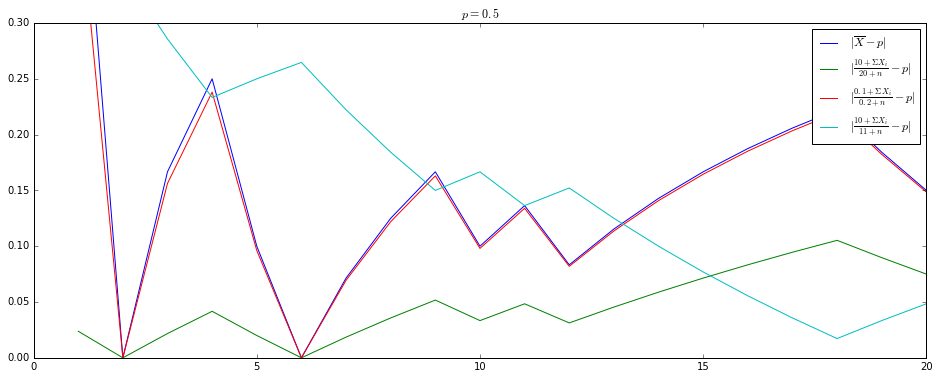

[0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0]


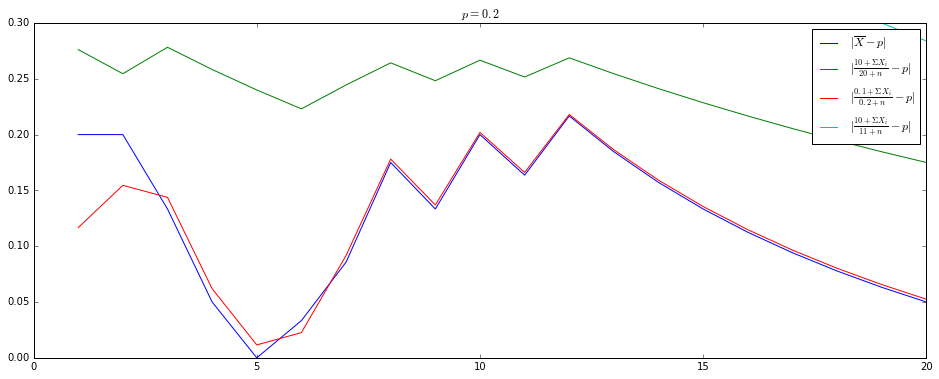

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0]


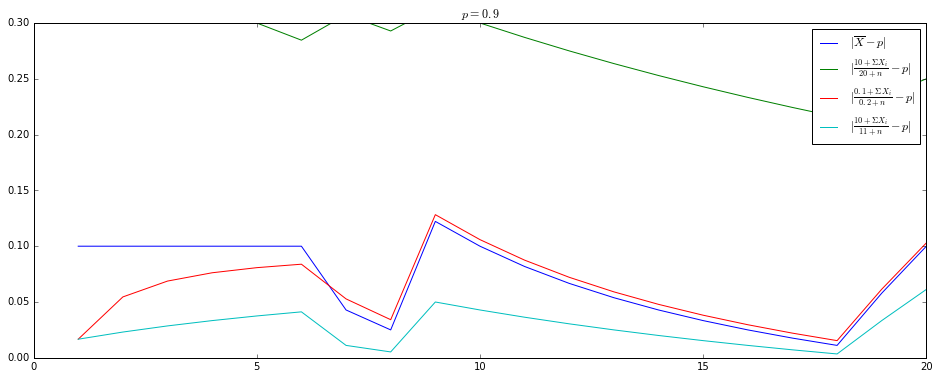

In [41]:
demonstrate(0.5)
demonstrate(0.2)
demonstrate(0.9)

<h2>Выводы:</h2>
<ul>
<li>$ p=0.5 $ - лучше всех показала себя оценка, в которой предполагалось, что монета честная</li>
<li>$ p=0.2 $ - примерно одинаково хорошо проявили себя оценки максимального правдоподобия $\overline X$ и "нечестная монета"</li>
<li>$ p=0.9 $ - лучше всех показала себя оценка, которой было известно, что будет смещение в сторону герба (что хорошо оправдалось)</li>
</ul>